In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [146]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


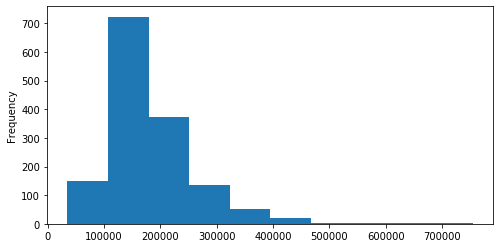

In [6]:
train['SalePrice'].plot(kind='hist',figsize=(8,4))

In [7]:
cor=(train.corr()['SalePrice']).copy()

In [8]:
cor

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [9]:
(abs(cor)).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [10]:
feature_with_na=[Feature for Feature in train.columns if (train[Feature].isnull().sum()>1)]

In [11]:
test[feature_with_na].isna().sum()

LotFrontage      227
Alley           1352
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

## Explanatory Data Analysis

In [12]:
discrete=[f for f in train.columns if (train[f].dtype!='O' and f!='Id' and len(train[f].unique())<25)]

In [13]:
len(discrete)

18

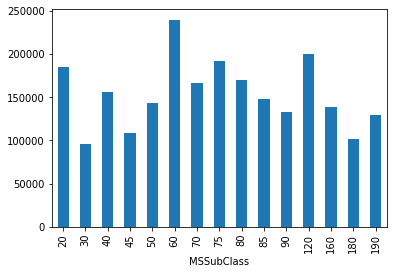

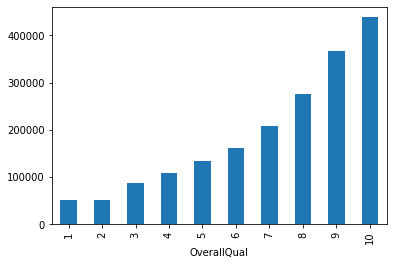

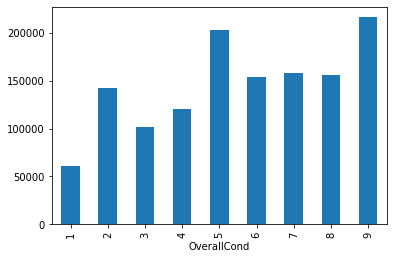

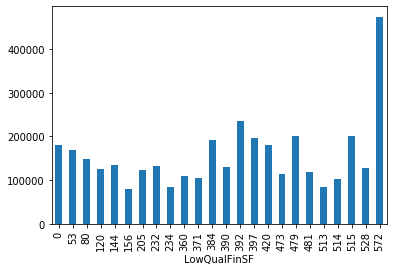

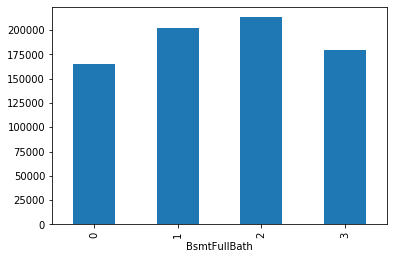

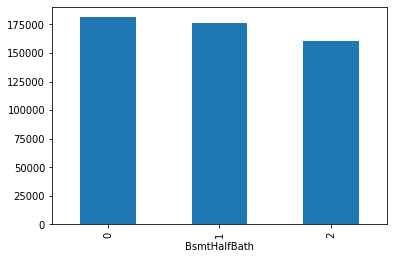

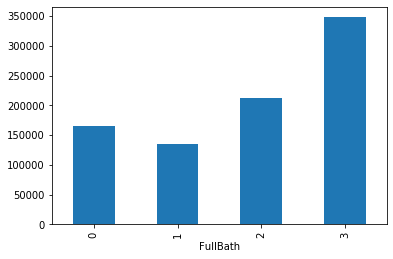

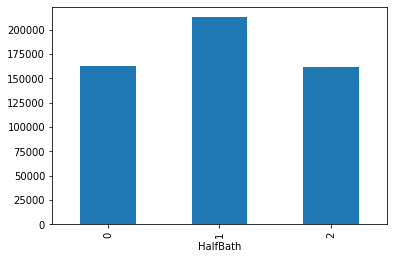

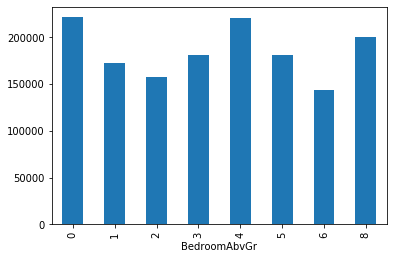

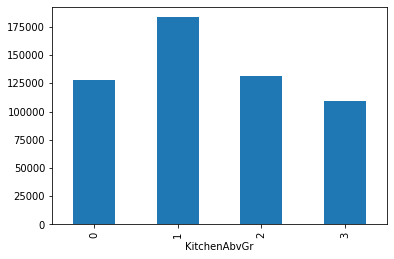

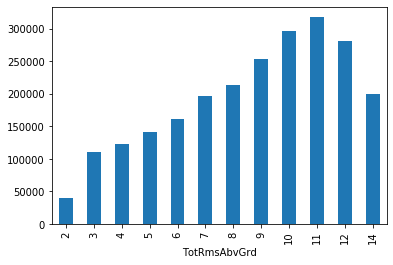

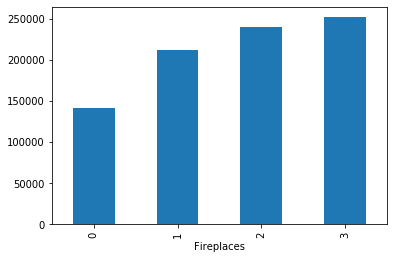

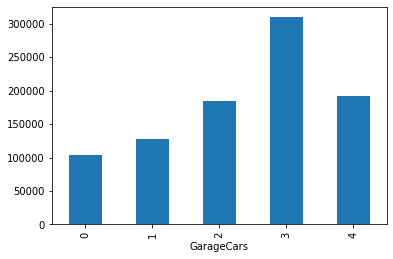

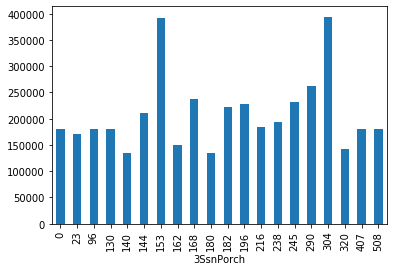

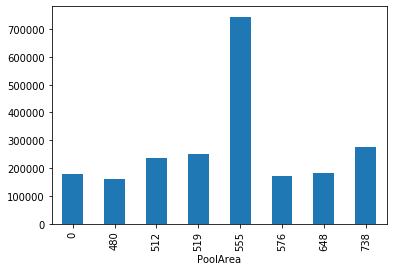

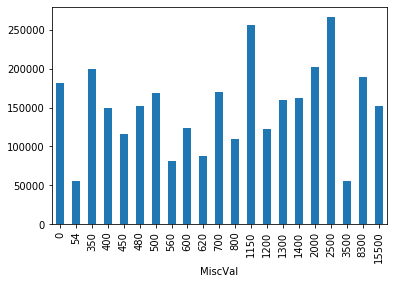

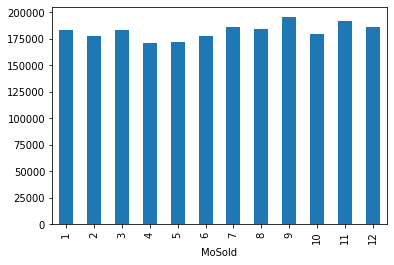

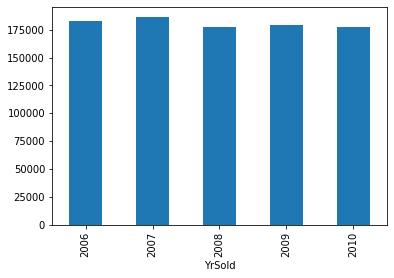

In [14]:
for f in discrete:
    train.groupby(f).mean()['SalePrice'].plot.bar()
    plt.show()
    

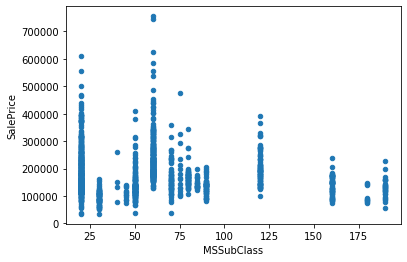

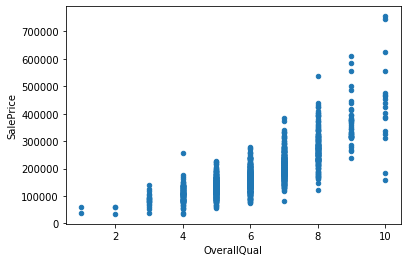

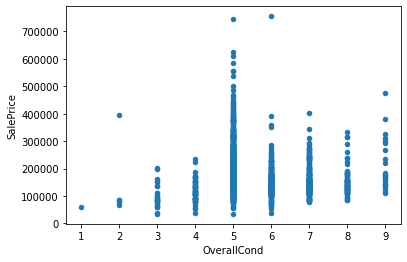

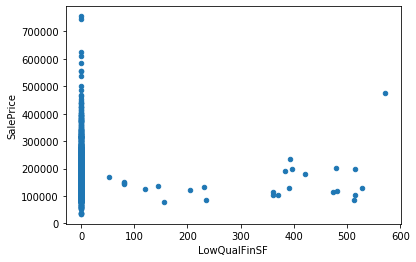

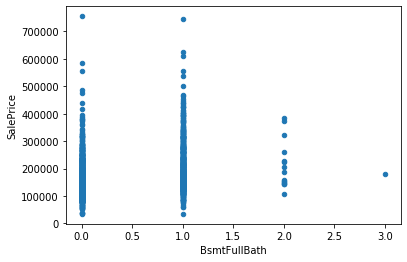

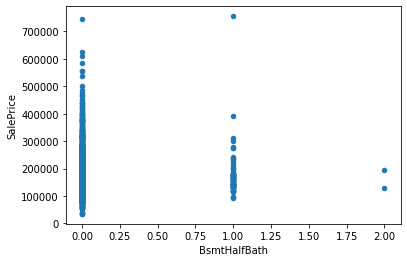

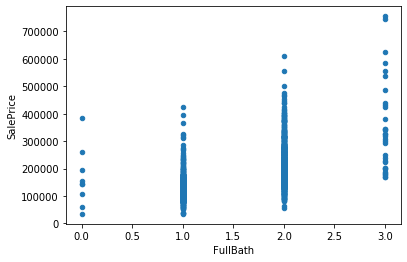

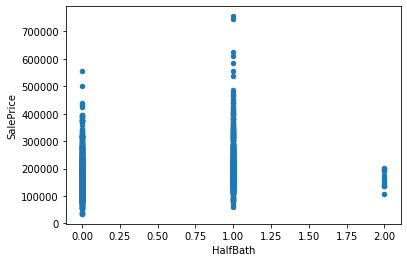

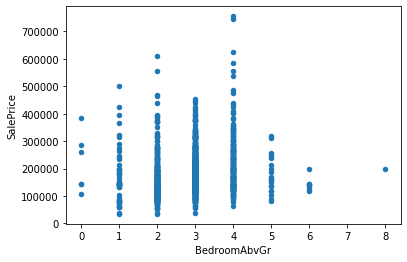

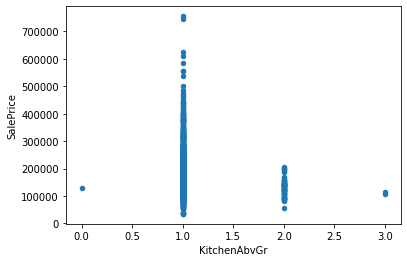

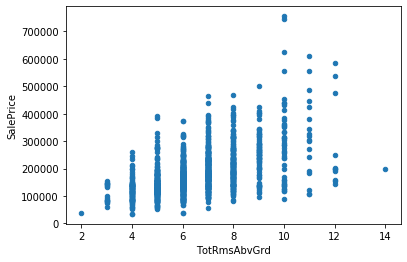

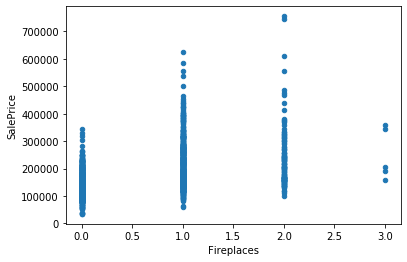

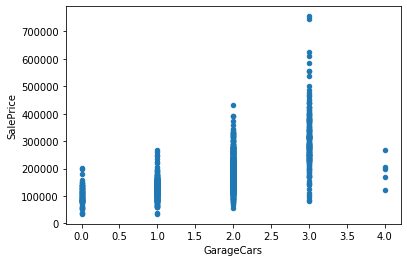

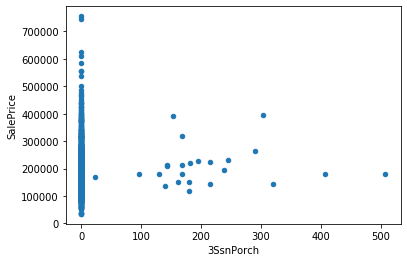

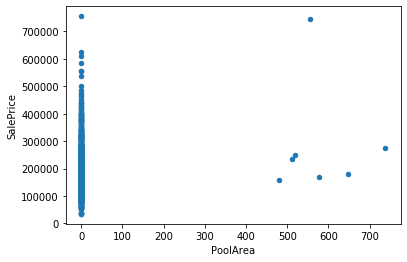

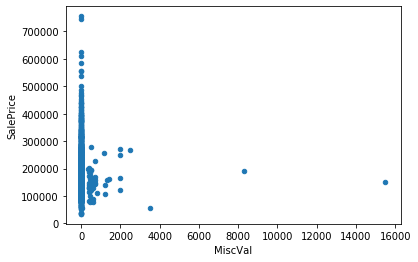

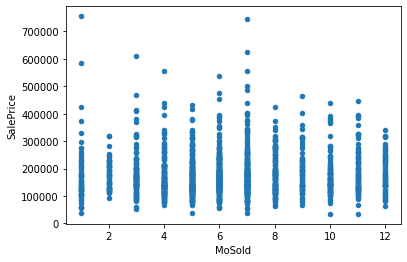

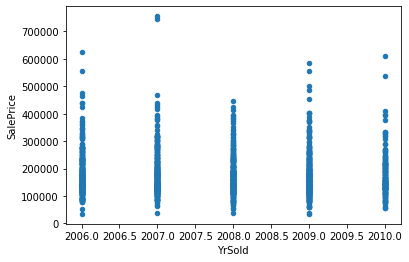

In [15]:
for f in discrete:
    train.plot.scatter(f,'SalePrice')
    plt.show()

In [16]:
contineous=[f for f in train.columns if (train[f].dtype!='O' and f!='Id' and len(train[f].unique())>25) and f!='SalePrice']
len(contineous)

18

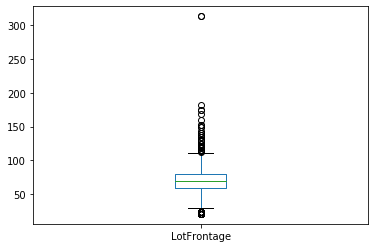

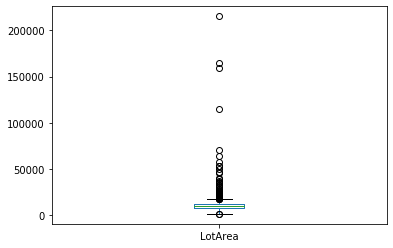

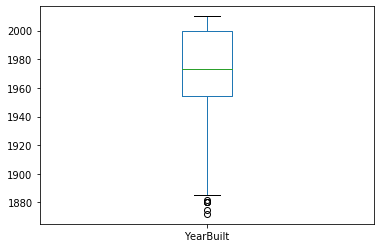

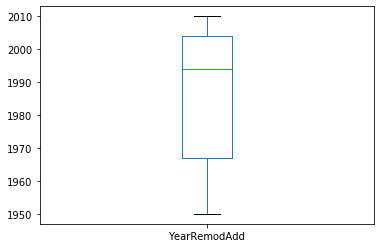

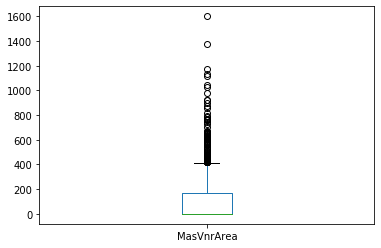

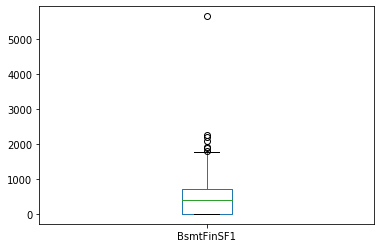

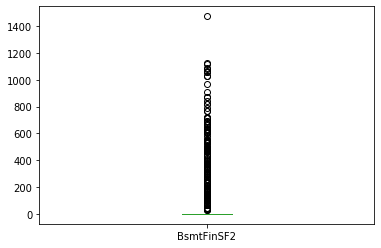

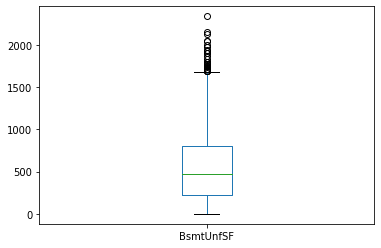

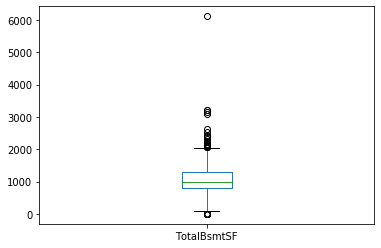

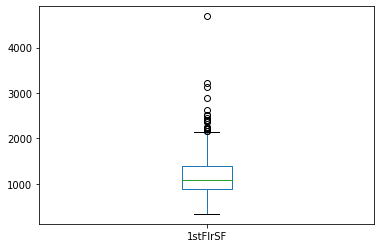

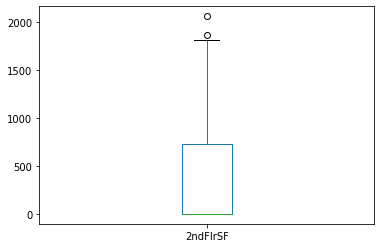

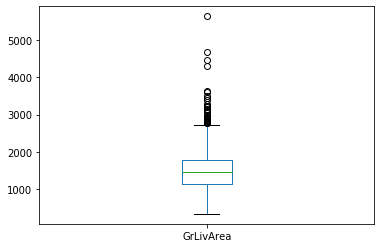

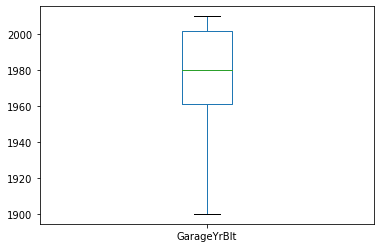

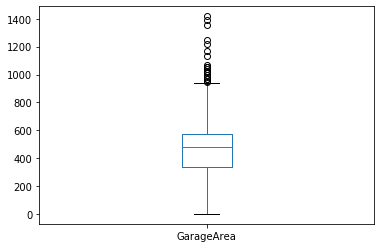

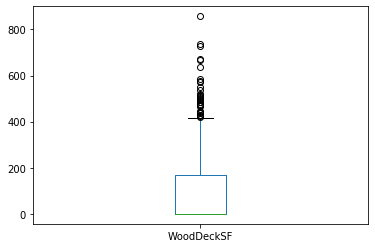

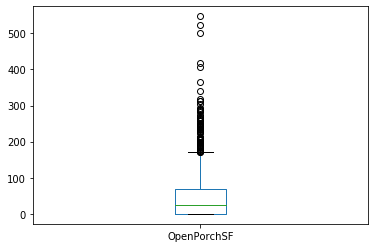

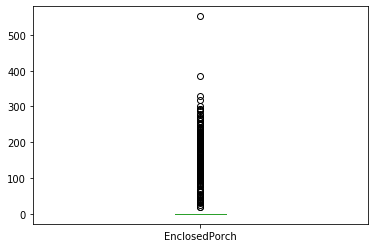

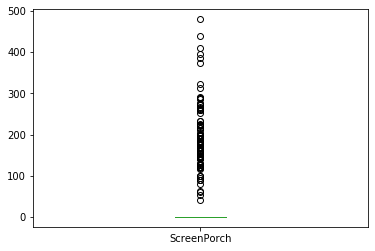

In [17]:
for f in contineous:
    train[f].plot.box()
    plt.show()

In [18]:
categorical=[f for f in train.columns if train[f].dtype=='O']

len(categorical)

43

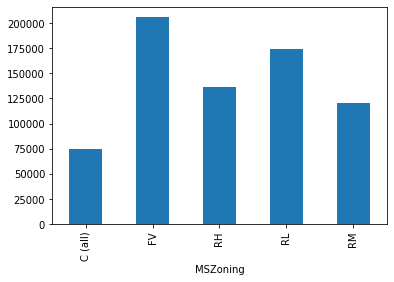

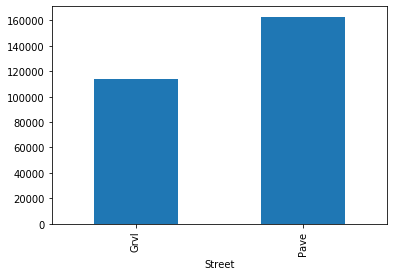

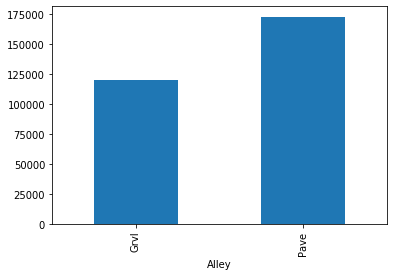

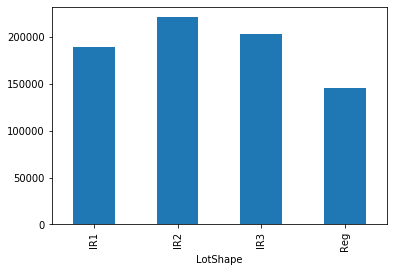

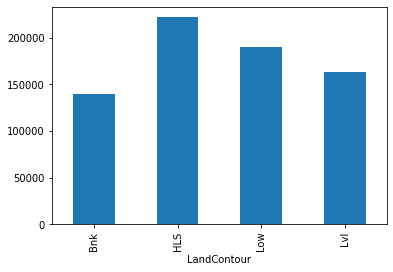

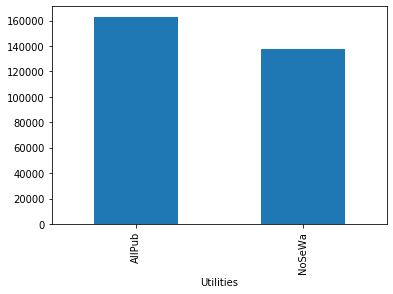

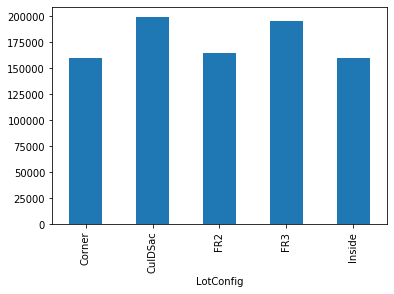

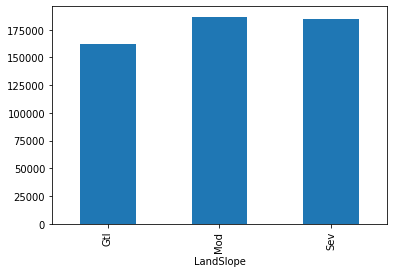

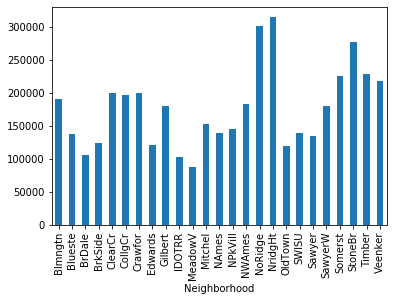

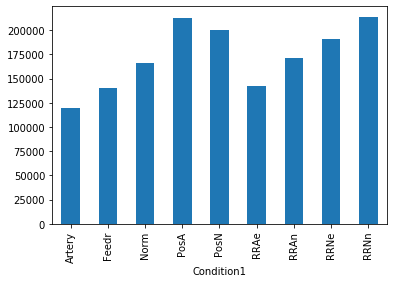

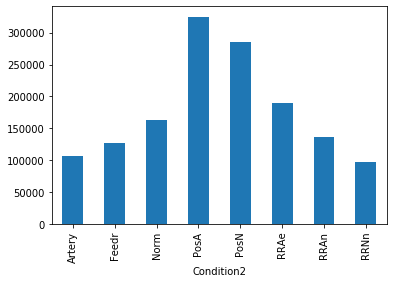

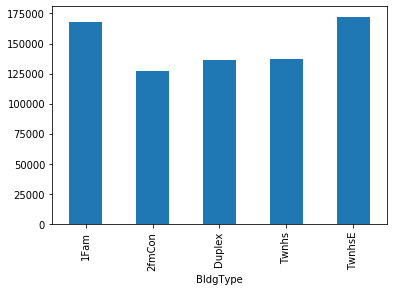

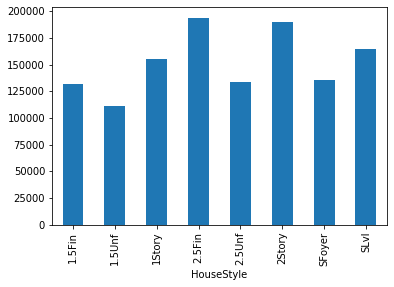

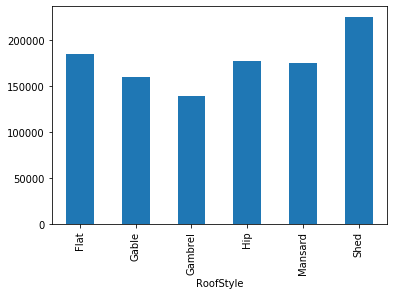

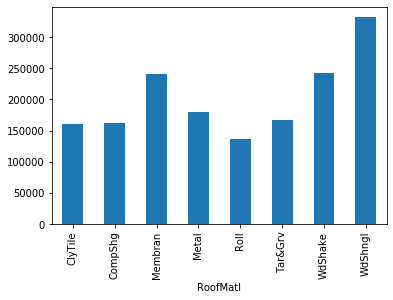

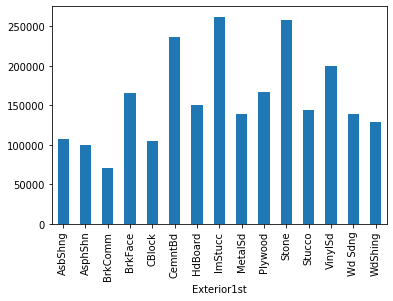

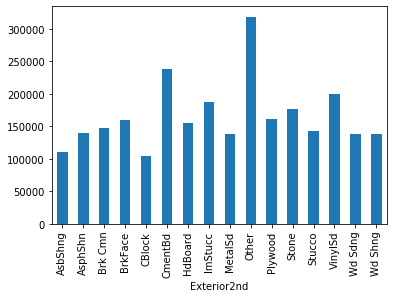

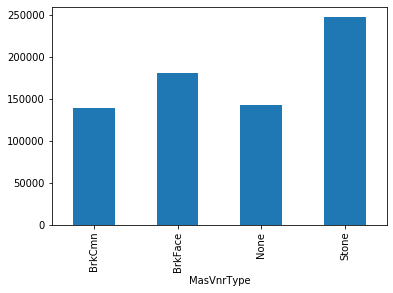

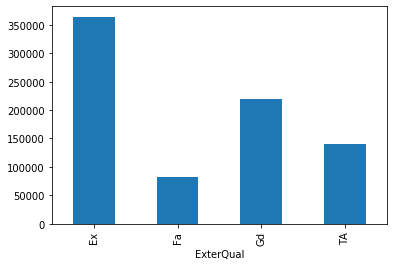

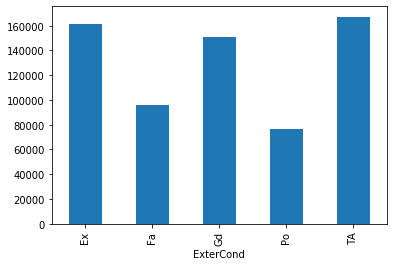

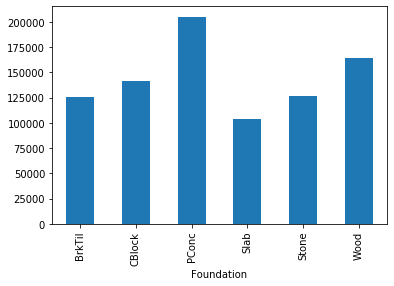

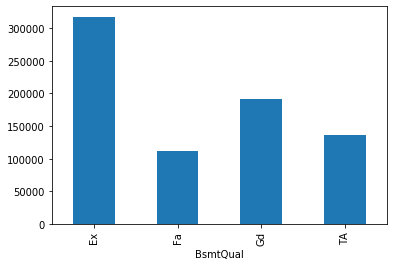

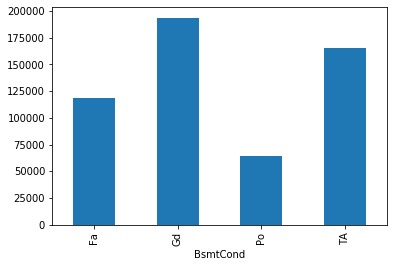

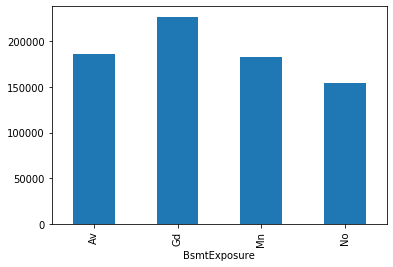

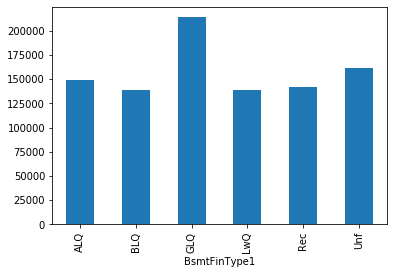

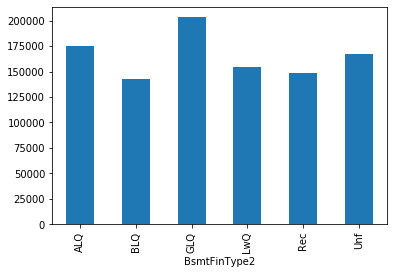

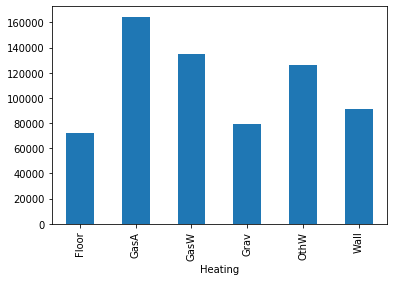

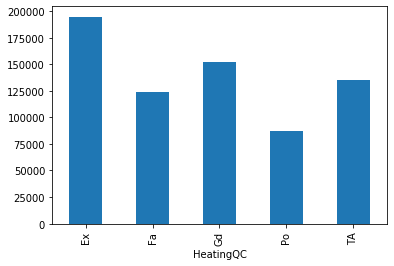

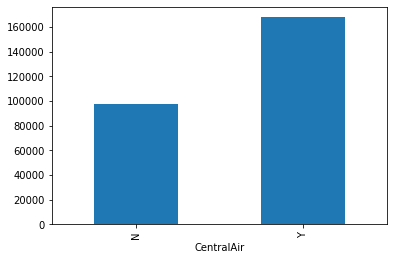

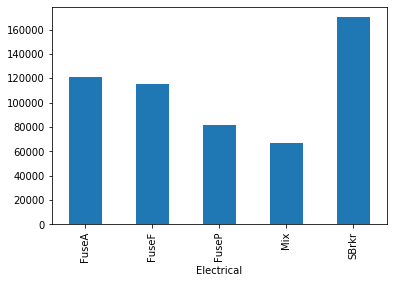

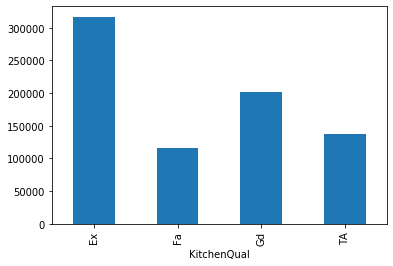

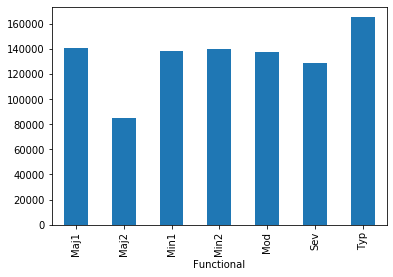

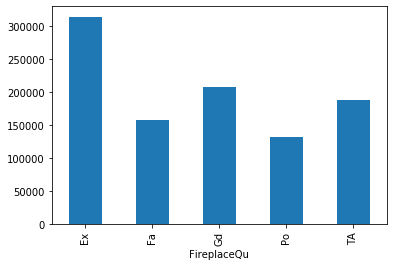

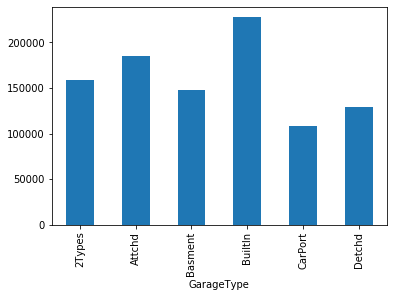

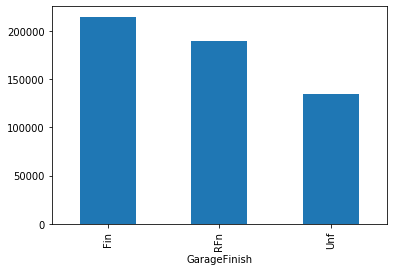

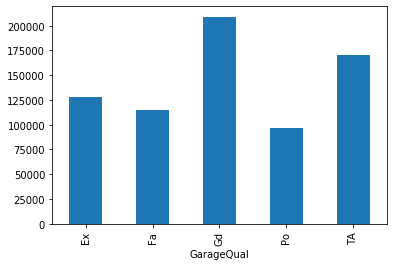

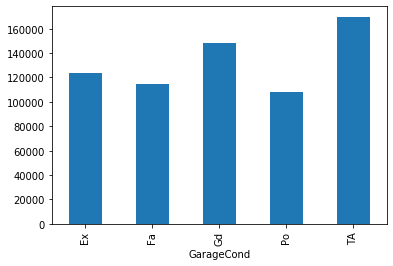

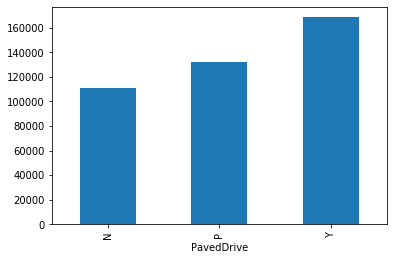

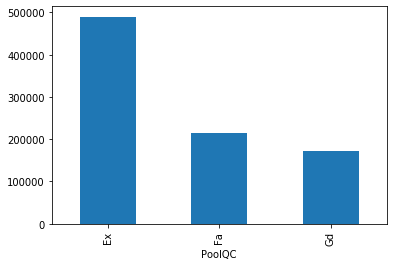

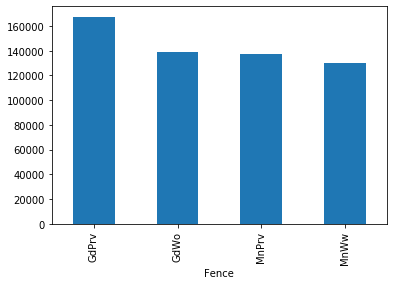

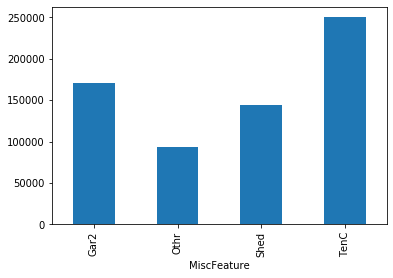

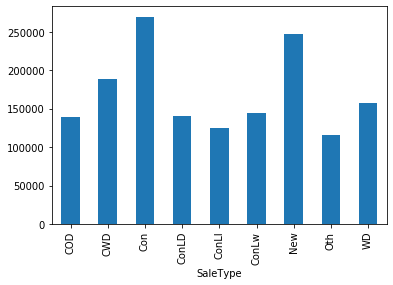

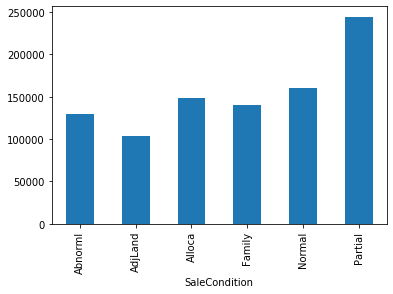

In [19]:
for f in categorical:
    train.groupby(f).median()['SalePrice'].plot(kind='bar')
    plt.show()

## Feature Engineering

### Missing values

In [147]:
for f in categorical:
    #print(train[f].value_counts())
    train[f]=train[f].fillna('Missing')

In [148]:
feature_with_na2=[f for f in feature_with_na if (train[f].isna().sum()>1)]

for f in feature_with_na2:
    med=train[f].median()
    train[f]=train[f].fillna(med)

In [149]:
for f in categorical:    
    temp=train.groupby(f)['SalePrice'].count()
    temp_df=temp[temp>20].index
    train[f]=(np.where(train[f].isin(temp_df),train[f],'Rare_var'))
    #print(len(train[f].unique()),f)`
train.shape

ordinal_f= ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
            'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','SaleCondition']

In [150]:
from sklearn.preprocessing import OrdinalEncoder
orden=OrdinalEncoder()
from sklearn.preprocessing import MinMaxScaler as mmscaler
from sklearn.preprocessing import StandardScaler as scaler

In [151]:
ordenc=orden.fit_transform(train[ordinal_f])

# REORGANIZE THEM

train[ordinal_f]=pd.DataFrame(ordenc,columns=ordinal_f)

train=pd.get_dummies(train,drop_first=True)

### Outlier

In [152]:
X1=scaler().fit_transform(train.drop('SalePrice',1))

In [153]:
X1=pd.DataFrame(X1,columns=train.drop('SalePrice',1).columns)


In [154]:
X1.shape

(1460, 141)

In [155]:
b=[]
for i,row in X1.iterrows():
    c=0
    for f in contineous:
        if(abs(row[f])>5):
            c=c+1
    if(c>0):
        b.append(i)
        

In [156]:
len(b)


47

In [157]:
train.drop(b,0,inplace=True)

In [158]:
train['SalePrice']=np.log(train['SalePrice'])

### Normalization

In [159]:
y=train['SalePrice']

In [160]:
train.drop('SalePrice',1,inplace=True)

In [161]:
X=scaler().fit_transform(train)

In [162]:
X.shape

(1413, 141)

In [163]:
train.shape

(1413, 141)

In [164]:
train.to_csv('clean_train.csv',index=False)

## Feature_selection

In [165]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [166]:
selector=SelectFromModel(Lasso(alpha=0.05,random_state=3)).fit(X,y)
sel_col=train.columns[selector.get_support()]
X=train[sel_col]

X=scaler().fit_transform(X)

X.shape

(1413, 12)

In [167]:
X=scaler().fit_transform(train)

# modelling


###  linear regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
regr=LinearRegression(normalize=False)
cross_val_score(regr,X,y,cv=10,scoring='r2').mean()

In [ ]:
regr.fit(X,y)

#### Gradient Boosting

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor()

In [61]:
params=dict(learning_rate=list(np.linspace(0.05,0.35,5)),
        max_features=['auto','sqrt','log2'],
        n_estimators=[60,70,80,90,100,110,120,130,140]
           )
    

In [ ]:
params

In [62]:
rsgb=RandomizedSearchCV(gbc,params,n_iter=10,cv=5,scoring='r2')
rsgb.fit(X,y)
rsgb.best_score_

0.9018482649942768

In [63]:
rsgb.best_params_

{'n_estimators': 110, 'max_features': 'sqrt', 'learning_rate': 0.125}

In [66]:
gbc=GradientBoostingRegressor(n_estimators=110,max_features='sqrt',learning_rate=0.125)

In [67]:
cross_val_score(gbc,X,y,cv=10,scoring='r2').mean()

0.898459763314216

In [68]:
gbc.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.125, loss='ls',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=110,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### RandomForest 

In [69]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [70]:
cross_val_score(rfr,X,y,cv=10,scoring='r2').mean()

0.8773337714976893

In [71]:
rfr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [96]:
params=dict(max_features=[None,'sqrt','log2','auto'],
        n_estimators=[20,60,100,120,160,200]
           )
    

In [97]:
rsrf=RandomizedSearchCV(rfr,params,n_iter=5,cv=10,scoring='r2')
rsrf.fit(X,y)
rsrf.best_score_

0.8802075719754063

In [98]:
rsrf.best_params_

{'n_estimators': 200, 'max_features': 'auto'}

In [101]:
rfr=RandomForestRegressor(n_estimators=200,max_features='auto')

In [102]:
cross_val_score(rfr,X,y,cv=10,scoring='r2').mean()

0.8792583691478099

In [103]:
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### XGBoost

In [111]:
#!pip install xgboost

import xgboost

In [114]:
xgb=xgboost.XGBRegressor( base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1, tree_method=None, validate_parameters=False,
             verbosity=None)

In [113]:
cross_val_score(xgb,X,y,cv=10,scoring='r2').mean()

0.8865540662244417

In [171]:
params=dict(
        max_depth=[3,4,5],
        min_child_weight=[9,10,11,12],
        )

In [172]:
rsxg=RandomizedSearchCV(xgb,params,n_iter=10,cv=5,scoring='r2')
rsxg.fit(X,y)
rsxg.best_score_

0.8959834007810812

In [173]:
rsxg.best_params_

{'min_child_weight': 10, 'max_depth': 3}

In [174]:
xgb=xgboost.XGBRegressor(min_child_weight= 10, max_depth= 5)

In [175]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

( base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Testing

In [176]:
train2=pd.read_csv('train.csv')

In [177]:
test.shape

(1459, 80)

In [178]:
for f in categorical:
    test[f]=test[f].fillna('Missing')

for f in feature_with_na2:
    med=test[f].median()
    test[f]=test[f].fillna(med)

In [179]:
for f in categorical:    
    temp=train2.groupby(f)['Id'].count()
    temp_df=temp[temp>20].index
    test[f]=(np.where(test[f].isin(temp_df),test[f],'Rare_var'))
    #print(len(train[f].unique()),f)
 

In [180]:
   
ordinal_f= ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
            'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','SaleCondition']

ordenc=orden.fit_transform(test[ordinal_f])

In [181]:
ordenc

array([[3., 0., 0., ..., 0., 2., 1.],
       [0., 0., 0., ..., 0., 3., 1.],
       [0., 0., 0., ..., 0., 2., 1.],
       ...,
       [3., 0., 0., ..., 0., 3., 0.],
       [3., 0., 0., ..., 0., 2., 1.],
       [3., 0., 1., ..., 0., 3., 1.]])

In [182]:
# REORGANIZE THEM

test[ordinal_f]=pd.DataFrame(ordenc,columns=ordinal_f)

In [183]:
test=pd.get_dummies(test,drop_first=True)

In [184]:
test.shape

(1459, 140)

In [185]:
for f in train.columns:
        if(f not in test):
            print(f)

Alley_Missing
MiscFeature_Rare_var


In [186]:
zero=np.zeros(1459)

test.drop('Alley_Rare_var',1,inplace=True)

test['Alley_Missing']=zero

test['MiscFeature_Rare_var']=zero

In [187]:
for f in test.columns:    
    med=test[f].median()
    test[f]=test[f].fillna(med)

In [188]:
test.isna().sum().sort_values(ascending =False)[1:20]

GarageCars       0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageFinish     0
3SsnPorch        0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
EnclosedPorch    0
ScreenPorch      0
LotConfig_FR2    0
MSZoning_RM      0
dtype: int64

In [189]:
X_test=scaler().fit_transform(test)

In [190]:
X_test

array([[-1.73086406, -0.87471081,  0.56732969, ...,  0.39972168,
         0.        ,  0.        ],
       [-1.72848977, -0.87471081,  0.61596272, ...,  0.39972168,
         0.        ,  0.        ],
       [-1.72611547,  0.06135085,  0.27553157, ...,  0.39972168,
         0.        ,  0.        ],
       ...,
       [ 1.72611547, -0.87471081,  4.45797141, ...,  0.39972168,
         0.        ,  0.        ],
       [ 1.72848977,  0.64638939, -0.30806469, ...,  0.39972168,
         0.        ,  0.        ],
       [ 1.73086406,  0.06135085,  0.27553157, ...,  0.39972168,
         0.        ,  0.        ]])

In [191]:
test=test[sel_col]

In [192]:
X=scaler().fit_transform(test)

X.shape

(1459, 12)

In [193]:
predictions=regr.predict(X_test)

predictions

p1=np.exp(predictions)

p1

test=pd.read_csv('test.csv')

output = pd.DataFrame({'Id': test.Id, 'Saleprice':p1})
output.to_csv('lasso-sel_lr.csv', index=False)
print("Your submission was successfully saved!")

plt.hist(p1)

NameError: name 'regr' is not defined

In [ ]:
regr.coef_

Your submission was successfully saved!


(array([115., 541., 396., 206.,  97.,  51.,  28.,  15.,   9.,   1.]),
 array([ 62728.77360228, 106891.79557217, 151054.81754206, 195217.83951196,
        239380.86148185, 283543.88345174, 327706.90542163, 371869.92739152,
        416032.94936141, 460195.97133131, 504358.9933012 ]),
 <a list of 10 Patch objects>)

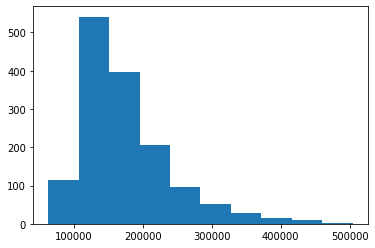

In [194]:
predictions=gbc.predict(X_test)
p1=np.exp(predictions)
test=pd.read_csv('test.csv')
output = pd.DataFrame({'Id': test.Id, 'Saleprice':p1})
output.to_csv('lasso-sel_gb.csv', index=False)
print("Your submission was successfully saved!")

plt.hist(p1)

Your submission was successfully saved!


(array([130., 541., 360., 201.,  99.,  56.,  40.,  18.,  11.,   3.]),
 array([ 65526.48943067, 108095.98399751, 150665.47856436, 193234.97313121,
        235804.46769806, 278373.9622649 , 320943.45683175, 363512.9513986 ,
        406082.44596545, 448651.94053229, 491221.43509914]),
 <a list of 10 Patch objects>)

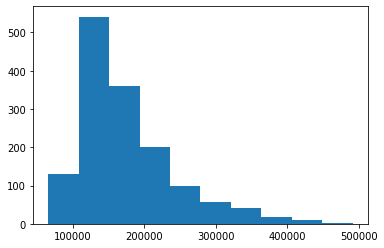

In [195]:
predictions=rfr.predict(X_test)
p1=np.exp(predictions)
test=pd.read_csv('test.csv')
output = pd.DataFrame({'Id': test.Id, 'Saleprice':p1})
output.to_csv('rfr_basic.csv', index=False)
print("Your submission was successfully saved!")

plt.hist(p1)

Your submission was successfully saved!


(array([147., 602., 383., 166.,  77.,  32.,  27.,  15.,   9.,   1.]),
 array([ 55621.54, 107380.38, 159139.23, 210898.08, 262656.94, 314415.78,
        366174.62, 417933.47, 469692.3 , 521451.16, 573210.  ],
       dtype=float32),
 <a list of 10 Patch objects>)

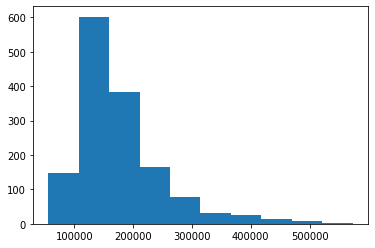

In [196]:
predictions=xgb.predict(X_test)
p1=np.exp(predictions)
test=pd.read_csv('test.csv')
output = pd.DataFrame({'Id': test.Id, 'Saleprice':p1})
output.to_csv('lasso-sel_xgb.csv', index=False)
print("Your submission was successfully saved!")

plt.hist(p1)

TypeError: nan is not a string

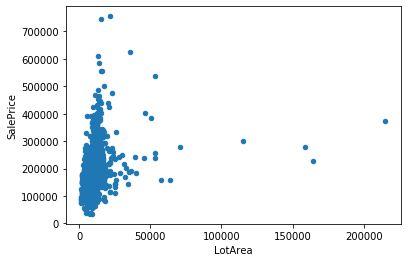

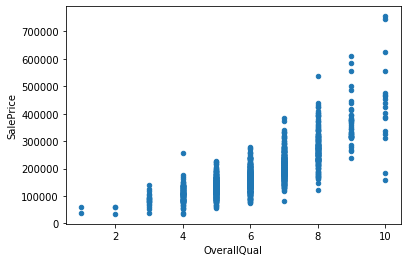

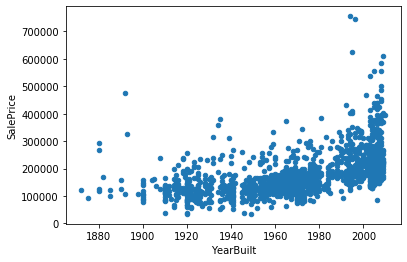

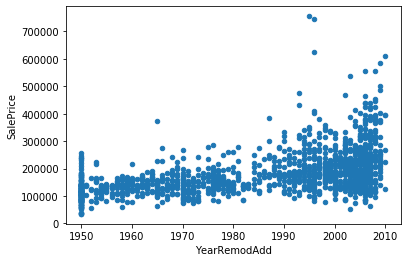

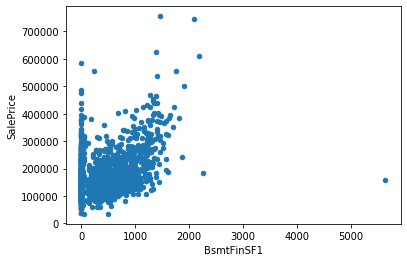

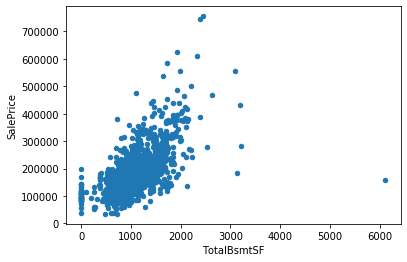

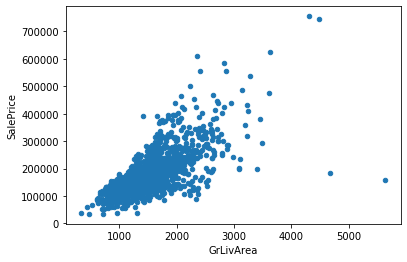

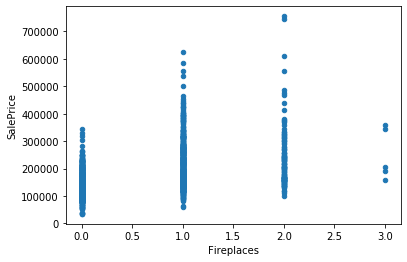

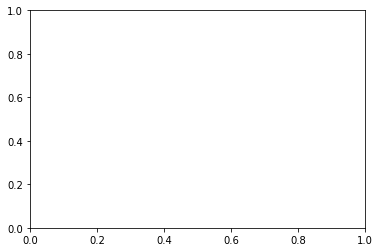

In [197]:
for f in sel_col:
    train2.plot.scatter(f,'SalePrice')